<a href="https://colab.research.google.com/github/MangoBicarbonate/SampleML/blob/main/DrugPriceForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libaries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

what directory am I in 

In [ ]:
!pwd

/content


// ChatGPT generated code explaination

This line of code reads a CSV file named "databaseOfPrices.csv" and loads its contents into a pandas DataFrame object called "df".

The pd.read_csv() function is a method provided by the pandas library that reads a CSV file and returns a DataFrame object containing the data. In this case, the CSV file is assumed to be located in the same directory as the Python script or Jupyter notebook where this code is being executed.

After the CSV file is loaded into the DataFrame object, the .head() method is called on the DataFrame to display the first few rows of the data. This is a quick way to verify that the data was loaded correctly and to get an idea of what the data looks like.

In [ ]:
df = pd.read_csv("databaseOfPrices.csv")
df.head()

,Medication_Name,Package_Size,Max_Retailer_Price,Max_Consumer_Price,Max_Consumer_VAT_Price,Year,Year_2007,Year_2012,Year_2017,Year_2022
0,ABBOSYNAGIS 100MG PUL FOR INJ+SOLV,1.0,6022.540139,7076.484664,8173.339786,2007,7076.484664,8137.957363,8845.605830,9553.254296
1,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,3584.941821,4212.306640,4865.214169,2007,4212.306640,4844.152636,5265.383300,5686.613964
2,ABITREN 100MG 10 SR TAB,10.0,13.581967,18.607294,21.491425,2007,18.607294,21.398389,23.259118,25.119847
3,ABITREN 100MG 20 SR TAB,20.0,27.163933,37.214589,42.982850,2007,37.214589,42.796777,46.518236,50.239695
4,ABITREN 25MG 20TAB,20.0,5.076567,6.954896,8.032905,2007,6.954896,7.998131,8.693620,9.389110


Drug Name provided by the user. Stored in Search.

In [ ]:
search = "ABBO"

This line of code filters the data in a pandas DataFrame called df based on a specific condition and stores the resulting subset of data in a new DataFrame called hits.

The condition used to filter the data is specified as df['Medication_Name'].str.contains(search). This condition checks if the values in the 'Medication_Name' column of the df DataFrame contain a specific string, which is stored in a variable called search. The str.contains() method is a string method provided by pandas that checks if a given string is contained in another string.

By applying this condition to the df DataFrame, the resulting hits DataFrame contains only the rows where the 'Medication_Name' column contains the specified string. This is a useful way to extract specific subsets of data from a larger DataFrame based on a specific criterion.

In [ ]:
hits = df[df['Medication_Name'].str.contains(search)]

This code selects specific columns from a pandas DataFrame called hits and returns a new DataFrame containing only those columns.

The specific columns selected are 'Year_2007', 'Year_2012', 'Year_2017', and 'Year_2022'. These column names are enclosed in a list and passed as an argument to the DataFrame indexing operator []. This operation returns a new DataFrame that contains only the selected columns.

The resulting DataFrame is then immediately returned by the code, since the hits variable is the last expression in the code block.

In [ ]:
hits = hits[['Year_2007', 'Year_2012', 'Year_2017', 'Year_2022']]
hits

,Year_2007,Year_2012,Year_2017,Year_2022
0,7076.484664,8137.957363,8845.60583,9553.254296
1,4212.306640,4844.152636,5265.38330,5686.613964


looks like a general increase for all the drug prices. The resulting model should be linear.

This code extracts the first row of a pandas DataFrame called hits, converts it to a dictionary format, and stores the resulting dictionary in a variable called m.

The hits.head(1) method returns the first row of the hits DataFrame as a new DataFrame object. The resulting DataFrame has only one row and the same columns as the original DataFrame. The to_dict() method is then called on this new DataFrame, which converts it to a dictionary format where the column names are keys and the row values are the corresponding values in the dictionary.

The resulting dictionary is then stored in a variable called m and returned as the output of the code block. This means that the code will display the resulting dictionary in the output or console.

In [ ]:
m = hits.head(1).to_dict()
m

{'Year_2007': {0: 7076.484664},
 'Year_2012': {0: 8137.957363},
 'Year_2017': {0: 8845.60583},
 'Year_2022': {0: 9553.254296}}

This code loops through the items in a dictionary called m['Year_2007'] and prints the first key-value pair it encounters, as well as storing the key in a variable called code.

The for loop iterates through the items in the m['Year_2007'] dictionary using the items() method, which returns a list of key-value pairs as tuples. For each key-value pair, the code assigns the key to the code variable and prints both the key and the value to the console using the print() function. The break statement is used to exit the loop after the first iteration, so that only the first key-value pair is printed.

In [ ]:
code = None
for key,value in m['Year_2007'].items():
    code = key
    print(key, value)
    break   

0 7076.484664


This code creates two NumPy arrays X and y, where X contains a sequence of years and y contains a sequence of values corresponding to the specific key code in the m dictionary for each year.

The np.array() method is used to create NumPy arrays from Python lists. In this case, X is created using a list of years [2007, 2012, 2017, 2022]. The y array is created using a list comprehension that extracts the values corresponding to the code key from the m dictionary for each year.

The resulting X and y arrays are returned by the code and displayed in the output or console. The X array contains a sequence of years, which can be used as input to a machine learning model. The y array contains the corresponding values for the specific key code, which can be used as the target variable in a machine learning model.

In [ ]:
X = np.array([2007, 2012, 2017, 2022])
y = np.array([m['Year_2007'][code], m['Year_2012'][code], m['Year_2017'][code], m['Year_2022'][code]])
y

array([7076.484664, 8137.957363, 8845.60583 , 9553.254296])

This code trains a linear regression model using the LinearRegression() class from the scikit-learn library, predicts the output for a new input, and prints the predicted output to the console.

The code first initializes a LinearRegression() object called regressor. This object represents the linear regression model that will be trained on the data.

Next, the code trains the model on some sample data X and y using the fit() method of the regressor object. The fit() method takes two arguments: the input data X and the target variable y. The reshape() method is used to reshape the data into a format that is compatible with scikit-learn, which requires a two-dimensional array as input.

After training the model, the code creates a new input new_X using the np.array() method. This input contains a sequence of years that are not included in the original sample data.

The code then uses the predict() method of the regressor object to predict the output for the new input. The predicted output is stored in a variable called predicted_y.

Finally, the code prints the predicted output to the console using the print() function.

Overall, this code is a common way to train a linear regression model, predict the output for new inputs, and print the results to the console. This can be useful when working with data that has a linear relationship between the input variables and the target variable, such as predicting the price of a house based on its size or location.

In [ ]:
# Create some sample data

# Initialize the linear regression model
regressor = LinearRegression()

# Train the model on the data
regressor.fit(X.reshape(-1,1), y.reshape(-1,1))

# Predict the output for a new input
new_X = np.array([[2023,2024,2025,2026,2027]])
predicted_y = regressor.predict(new_X.reshape(-1,1))

# Print the predicted output
print(predicted_y)

[[ 9786.77828996]
 [ 9949.53743722]
 [10112.29658448]
 [10275.05573174]
 [10437.814879  ]]


This code converts the predicted output from a two-dimensional NumPy array to a one-dimensional NumPy array using the flatten() method, and stores the resulting array in a variable called forecasted_prices.

The predicted_y variable contains the predicted output from a linear regression model for a new input, as calculated in the previous code block. This output is stored as a two-dimensional NumPy array, where each row represents a separate prediction.

The flatten() method is used to convert this two-dimensional array into a one-dimensional array by combining all the rows into a single sequence of values. This is done to simplify the array format and make it easier to work with.

The resulting one-dimensional array is then stored in a variable called forecasted_prices and returned by the code. The array contains the predicted prices for the new input, based on the linear regression model that was trained on the sample data.

In [ ]:
forecasted_prices = predicted_y.flatten()
forecasted_prices

array([ 9786.77828996,  9949.53743722, 10112.29658448, 10275.05573174,
       10437.814879  ])

This code creates a list of years and appends five additional years to the list using a for loop.

The initial list of years is specified as [2007,2012,2017,2022]. This list contains four years that were used as input data for a machine learning model in a previous code block.

The for loop iterates over a range of years from 2023 to 2027 (inclusive) using the range() function. For each year in the range, the code appends the year to the years list using the append() method.

After the loop completes, the resulting years list contains the original four years, as well as the additional five years that were appended in the loop.



In [ ]:
years = [2007,2012,2017,2022]
for year in range(2023, 2028):
    years.append(year)
years

[2007, 2012, 2017, 2022, 2023, 2024, 2025, 2026, 2027]

This code creates a list of prices for a specific key, and appends additional prices to the list using a for loop.

The initial list of prices is specified as [m['Year_2007'][code], m['Year_2012'][code], m['Year_2017'][code], m['Year_2022'][code]]. This list contains the actual prices for the years 2007, 2012, 2017, and 2022, corresponding to the specific key identified by code.

The for loop iterates over a sequence of forecasted prices using the forecasted_prices variable from a previous code block. For each price in the sequence, the code appends the price to the prices list using the append() method.

After the loop completes, the resulting prices list contains the original four prices, as well as the additional forecasted prices for the next five years.

In [ ]:
prices = [m['Year_2007'][code], m['Year_2012'][code], m['Year_2017'][code], m['Year_2022'][code]]
for price in forecasted_prices:
    prices.append(price)
prices

[7076.484664,
 8137.957363,
 8845.60583,
 9553.254296,
 9786.77828995994,
 9949.53743721993,
 10112.296584479976,
 10275.055731739965,
 10437.814878999954]

This code creates a new pandas DataFrame called df_display with two columns: 'Years' and 'Price Forecast'. The 'Years' column contains a sequence of years, and the 'Price Forecast' column contains a corresponding sequence of prices.

The first line of code creates an empty DataFrame object called df_display using the pd.DataFrame() function from pandas.

The next two lines of code create two new columns in the df_display DataFrame called 'Years' and 'Price Forecast', respectively. The 'Years' column is initialized with the years list from a previous code block, and the 'Price Forecast' column is initialized with the prices list from a previous code block.

The resulting df_display DataFrame has two columns and multiple rows, with each row representing a specific year and the corresponding forecasted price. This DataFrame can be used to visualize or further analyze the price forecast data in a tabular format.

In [ ]:
df_display = pd.DataFrame()
df_display['Years'] = years
df_display['Price Forecast'] = prices

This code uses the seaborn and matplotlib libraries to create a scatter plot with a linear regression line that visualizes the relationship between the 'Years' and 'Price Forecast' columns in a pandas DataFrame called df_display.

The %matplotlib inline magic command is used to display the resulting plot within the output or console of the Jupyter notebook or Python environment.

The import statements import the necessary libraries to create the plot. The seaborn library provides a high-level interface for creating statistical graphics, and the matplotlib.pyplot library provides a low-level interface for creating various types of plots.

The sns.lmplot() function is used to create a scatter plot with a linear regression line. The x and y arguments specify the 'Years' and 'Price Forecast' columns from the df_display DataFrame, respectively. The data argument specifies the DataFrame to use as input data, and the fit_reg argument specifies whether to display the linear regression line.

The plt.xticks() function is used to rotate the x-axis labels by 45 degrees, making them easier to read. The plt.show() function is then used to display the resulting plot in the output or console.

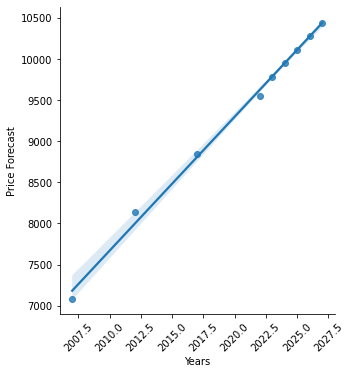

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Years',y='Price Forecast',data=df_display,fit_reg=True);
plt.xticks(rotation=45)
plt.show()